In [1]:
from datasets import *
from iv2_utils import iv2
from utils import plot_caption_and_duration_distributions, plot_peak_dataset_stats
import random
import json
import matplotlib.pyplot as plt
from datasets import load_dataset, Dataset
from tabulate import tabulate
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import numpy as np
import torch.nn.functional as F
import gc
from huggingface_hub import notebook_login

dataset = Dataset.from_csv('labeling_tasks_cleaned.csv')
dataset

Dataset({
    features: ['video', 'caption', 'row_id', 'revised_caption', 'action_score', 'status', 'assigned_to', 'assigned_at', 'build_up', 'peak_start', 'peak_end', 'drop_off', 'peaks'],
    num_rows: 1037
})

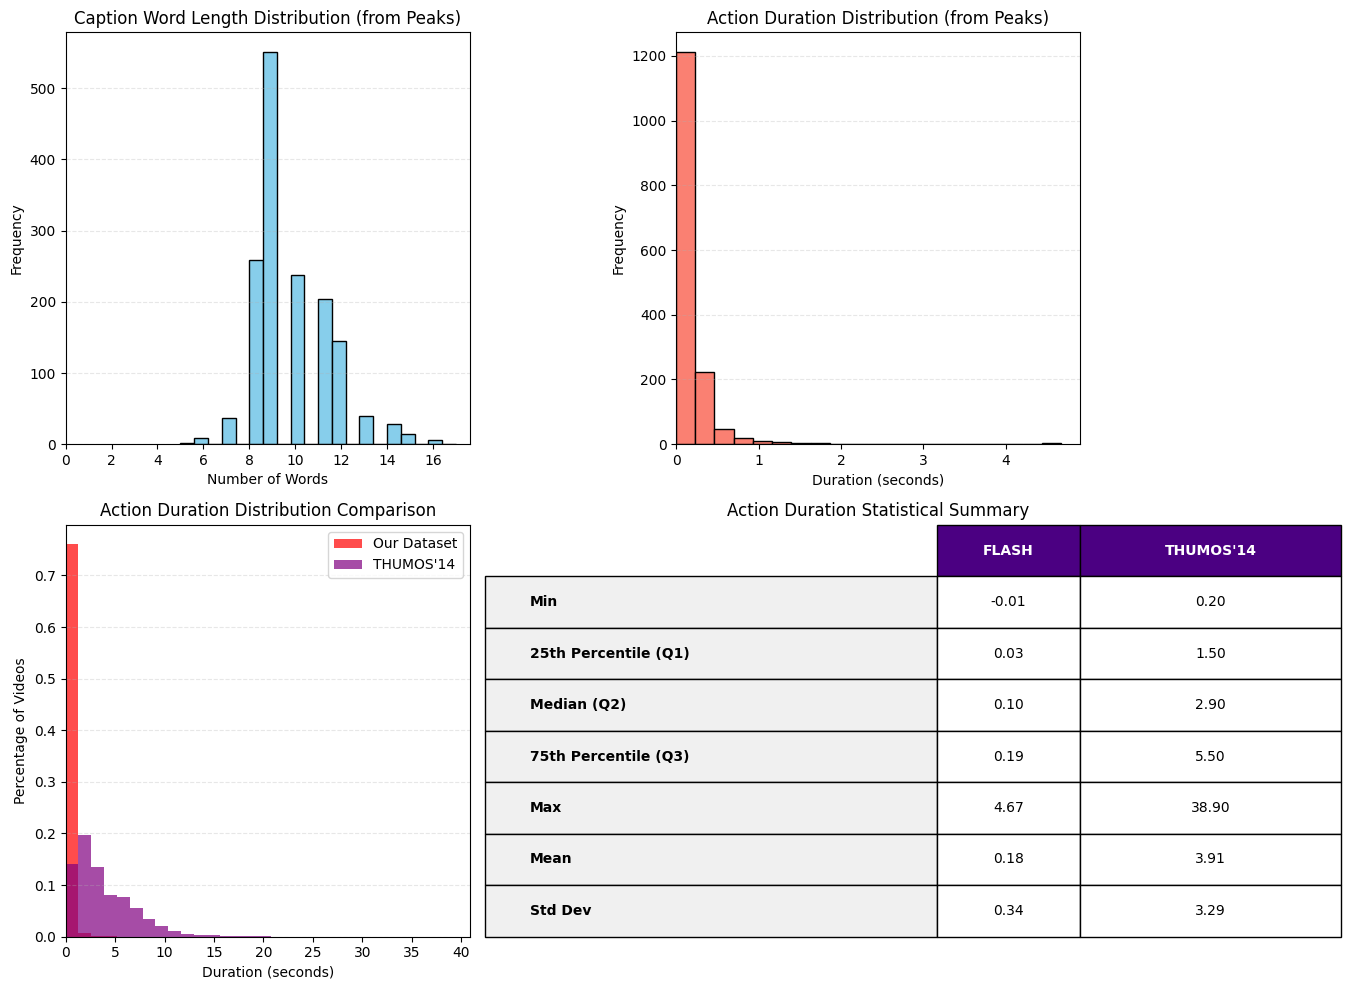

In [2]:
plot_peak_dataset_stats(dataset)